In [9]:
import pandas as pd

In [10]:
import numpy as np

In [11]:
import matplotlib.pyplot as plt

In [12]:
import seaborn as sns

In [15]:
casas=pd.read_csv('original.csv')
casas[:3]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."


In [16]:
casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


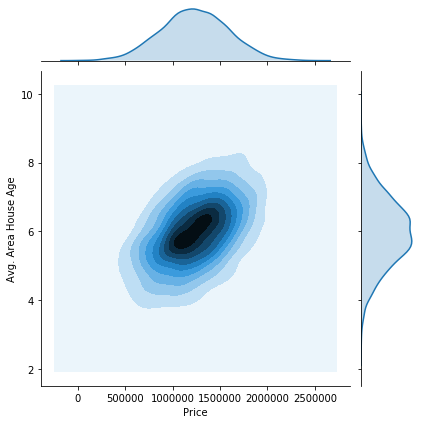

In [21]:
sns.jointplot(x='Price', y='Avg. Area House Age', data=casas, kind='kde')

In [22]:
casas.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [29]:
c=casas.columns

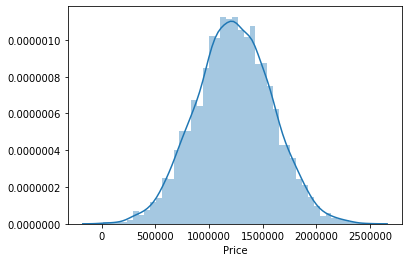

In [30]:
sns.distplot(casas[c[5]])

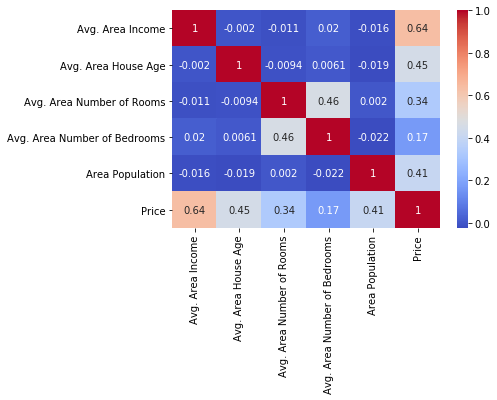

In [33]:
sns.heatmap(casas.corr(), cmap='coolwarm', annot=True)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [46]:
X = casas[[c[0], c[1], c[2], c[3], c[4]]] 

In [47]:
Y = casas[c[5]]

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [76]:
lrm = LinearRegression()
lrm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
from sklearn import metrics

In [78]:
predicciones = lrm.predict(X_test)

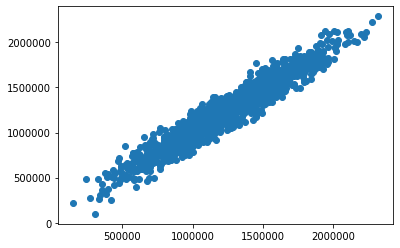

In [79]:
plt.scatter(Y_test, predicciones)

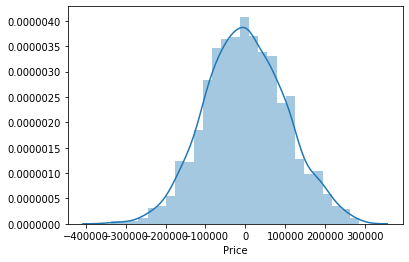

In [80]:
sns.distplot(Y_test-predicciones)

MAE (Mean absolute error) -> media del valor absoluto de los errores

In [81]:
metrics.mean_absolute_error(Y_test, predicciones)

80122.59073168965

MSE (Mean square errors) -> media de los errores al cuadrado

In [82]:
MSE = metrics.mean_squared_error(Y_test, predicciones)

RMSE (Raiz de los errores al cuadrado)

In [83]:
np.sqrt(MSE)

100118.72781702802